# Langchain Prompt

---
## 1. Using PromptTemplate
- This is the most common and flexible method. You define a prompt with placeholders that get filled in dynamically.

In [5]:
from langchain_core.prompts import PromptTemplate
from langchain_groq import ChatGroq
from langchain_core.output_parsers import StrOutputParser
from dotenv import load_dotenv

load_dotenv()

output_parser = StrOutputParser()
# llm = ChatGroq(model="llama-3.1-8b-instant")   # 8b model  - faster model
llm = ChatGroq(model="llama-3.3-70b-versatile")  # 70b model  x8 better but slower

#### Use PrompTemplate.from_template to pass in a single simple prompt text

In [6]:
prompt = PromptTemplate.from_template("Write a funny 3 line poem about {topic}")
formatted_prompt = prompt.format(topic="cats")
result = llm.invoke(formatted_prompt)
print(result.content)

Cats are little furballs of doom,
Their cute faces hide their evil gloom,
They'll cuddle and purr, then scratch your room.


#### User PrompTemplate initialization with input_variables and template parametr and a LCEL

In [7]:
prompt = PromptTemplate(
    input_variables = ["product"],
    template = "List 3 benefits of using {product}"
)

chain = prompt | llm | output_parser

result = chain.invoke({"product":"soap"})
result

'Here are three benefits of using soap:\n\n1. **Cleansing and Hygiene**: Soap helps to remove dirt, grime, and microorganisms from the skin, promoting good hygiene and reducing the risk of infections.\n2. **Moisturizing and Skin Health**: Many soaps, especially those with natural ingredients, can help to moisturize and nourish the skin, leaving it feeling soft, smooth, and healthy.\n3. **Freshness and Odor Control**: Soap can help to eliminate body odor and leave a fresh, clean scent, boosting confidence and self-esteem, and making social interactions more enjoyable.'

####  you can also do

In [8]:
prompt = PromptTemplate(
    input_variables = ["product"],
    template = "List 3 benefits of using {product}"
)
final_prompt =prompt.format(product="soap")

chain = prompt | llm | output_parser
result = chain.invoke(final_prompt)
result

'Here are 3 benefits of using soap:\n\n1. **Cleanses the skin**: Soap helps to remove dirt, grime, and other impurities from the skin, leaving it feeling clean and refreshed.\n2. **Kills germs and bacteria**: Soap has antibacterial properties that help to kill germs and bacteria on the skin, reducing the risk of infection and illness.\n3. **Moisturizes and softens the skin**: Many soaps, especially those with moisturizing ingredients, help to soften and hydrate the skin, leaving it feeling smooth and supple.'

#### You can use Prompt_template.from_template to pass in a simple template

---
---
## 2. Using ChatPromptTemplate for Chat Models
- Designed for chat-based models (like OpenAI's gpt-3.5/4). Supports message roles (user, system, assistant).

In [14]:
from langchain_core.prompts import ChatPromptTemplate, SystemMessagePromptTemplate, HumanMessagePromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage
# llm and output_parser defined in previous cells

prompt = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template("You are an AI assistant that only output 3 line funny poem"),
    HumanMessagePromptTemplate.from_template("write about {topic}")
])

# if you ue HumanMessage, and SystemMessage you cannot pass in variable.
# the llm will see the message as  'write about {topic}" the topic as passed in invoke will not replace the variable
# the llm will like you ask you what is the topic because the topic variable was not replaced.
# prompt = ChatPromptTemplate.from_messages([
#     SystemMessage(content="You are an AI assistant that only output 3 line funny poem"),
#     HumanMessage(content="write about {topic}")
# ])

chain  = prompt | llm | output_parser

result = chain.invoke({"topic":"third world war"})
print(result)

Bombs will fall, and wars will rage,
Third world war, a crazy stage,
Humans fight, in a foolish age.


## Note that `from_messages` will expect list of messages and `from_template` will expect a string

Cha

In [29]:
msg="list 2 vehicle maker name"

prompt= ChatPromptTemplate.from_template(msg)
print(prompt.format_prompt(), '\n\n')

prompt2 = PromptTemplate.from_template(msg)
print(prompt2.format_prompt(), '\n\n')

prompt3 = ChatPromptTemplate.from_messages([
    SystemMessage(content="give only the response. no suffice or prefix description"),
    HumanMessage(content="List 2 {animal} names"),
])
print(prompt3.format_prompt(cat='cat'), '\n\n')


prompt4 = ChatPromptTemplate.from_messages([
    SystemMessagePromptTemplate.from_template("give only the response. no suffice or prefix description"),
    HumanMessagePromptTemplate.from_template("List 2 {animal} names"),
])
print(prompt4.format_prompt(animal='cat'), '\n\n')


prompt5 = ChatPromptTemplate.from_messages([
   ("system","give only the response. no suffice or prefix description"),
   ("human","List 2 {animal} names"),
])
print(prompt5.format_prompt(animal='cat'), '\n\n')

messages=[HumanMessage(content='list 2 vehicle maker name', additional_kwargs={}, response_metadata={})] 


text='list 2 vehicle maker name' 


messages=[SystemMessage(content='give only the response. no suffice or prefix description', additional_kwargs={}, response_metadata={}), HumanMessage(content='List 2 {animal} names', additional_kwargs={}, response_metadata={})] 


messages=[SystemMessage(content='give only the response. no suffice or prefix description', additional_kwargs={}, response_metadata={}), HumanMessage(content='List 2 cat names', additional_kwargs={}, response_metadata={})] 


messages=[SystemMessage(content='give only the response. no suffice or prefix description', additional_kwargs={}, response_metadata={}), HumanMessage(content='List 2 cat names', additional_kwargs={}, response_metadata={})] 




#### for ChatPromptTemplate you can also do

In [13]:
# ChatPromptTemplate takin a list of tuples options "system", "human","ai"
prompt = ChatPromptTemplate.from_messages([
   ("system","You are an AI assistant that only output 3 line funny poem"),
    ("human","write about {topic}")
])

chain  = prompt | llm | output_parser

formatted_prompt = prompt.format_messages(topic="artificial intelligence") ## pass in a format  instead of chain invoke
result = chain.invoke(formatted_prompt)
#or you pass it this way
# result = chain.invoke({'topic':'artificial intelligence'})
print(result)

Robots are smart, it's true,
They'll steal our jobs, and our shoes too,
AI's the future, oh what to do!


---
---
## 3. FewShotPromptTemplate
- Creates prompts with multiple examples for few-shot learning.

In [30]:
from langchain_core.prompts import FewShotPromptTemplate, PromptTemplate

examples = [
    {"input": "happy", "output": "sad"},
    {"input": "tall", "output": "short"},
]

prompt = PromptTemplate(
    input_variables = ["input","output"],
    template= "Input {input}\nOutput: {output}"
)

shot_prompt = FewShotPromptTemplate(
    examples= examples,
    example_prompt=prompt,
    prefix="Give the opposite of each word",
    suffix="Input {adjective}\nOutput:",
    input_variables=["adjective"]
)

chain = shot_prompt | llm | output_parser
result = chain.invoke({"adjective":"boy"})
print(result)

The opposite of "boy" is "girl".


In [35]:
from langchain.prompts import FewShotChatMessagePromptTemplate, ChatPromptTemplate
from langchain.prompts.chat import ChatPromptTemplate

examples = [
    {"input": "2+2", "output": "4"},
    {"input": "2+3", "output": "5"},
]

example_prompt = ChatPromptTemplate.from_messages([
    ("human", "{input}"),
    ("ai", "{output}"),
])

few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
)

# full_prompt = ChatPromptTemplate.from_messages(
#     ("syste,","you are an Maths assistant"),
#     few_shot_prompt,
#     ("human","{input}")
# )

chain = few_shot_prompt | llm  #| output_parser
result = chain.invoke({"input":"5 + 7"})
print("Result is",result)

Result is content='' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 1, 'prompt_tokens': 28, 'total_tokens': 29, 'completion_time': 0.00796435, 'prompt_time': 0.000491702, 'queue_time': -9223372036.855268, 'total_time': 0.008456052}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None} id='run--1fa92f7c-7e4c-4334-b35e-0002c1986c07-0' usage_metadata={'input_tokens': 28, 'output_tokens': 1, 'total_tokens': 29}


---
---
4. ## Importing prompt from langchain hub

In [1]:
from langchain import hub
 

# prompt = hub.pull("homanp/question-answer-pair")
prompt = hub.pull("poem/task_poem_generater")

chat = prompt |llm|output_parser
# result = chat.invoke({"number_of_pairs": "3","data_format":"Y-m-d","context":"question about school"})
result = chat.invoke({"topic":"Write a poem about cats, in 8 lines"})
print(result)

ImportError: cannot import name 'hub' from 'langchain' (C:\lang1\venvi\Lib\site-packages\langchain\__init__.py)

In [1]:
import os
from langchainhub import hub  # Correct import
from langchain_groq import ChatGroq
from langchain_core.output_parsers import StrOutputParser
from dotenv import load_dotenv

load_dotenv()

# 1. Initialize the LLM (Using the updated Llama 3.3 model)
llm = ChatGroq(model="llama-3.3-70b-versatile")
output_parser = StrOutputParser()

# 2. Pull the prompt from LangChain Hub
# Note: Ensure the handle "poem/task_poem_generater" exists or use a public one
try:
    prompt = hub.pull("rlm/rag-prompt") # This is a common public prompt for example
    # If you specifically want a poem one, ensure the name is correct:
    # prompt = hub.pull("poem/task_poem_generater") 
except Exception as e:
    print(f"Error pulling from hub: {e}")
    # Fallback to a simple template if the hub pull fails
    from langchain_core.prompts import ChatPromptTemplate
    prompt = ChatPromptTemplate.from_template("Write a poem about {topic}")

# 3. Create the Chain using the pipe (|) operator
# This connects: Prompt -> LLM -> Output Parser
chat_chain = prompt | llm | output_parser

# 4. Invoke the chain
# IMPORTANT: The dictionary keys must match the variables in the Hub prompt
result = chat_chain.invoke({"topic": "cats in space", "question": "Write an 8 line poem"})

print(result)

ImportError: cannot import name 'hub' from 'langchainhub' (C:\lang1\venvi\Lib\site-packages\langchainhub\__init__.py)

---
---
##  5. Using PipelinePromptTemplate
- Allows combining multiple prompt templates in sequence. this is deprecated

In [4]:
from langchain_core.prompts import PromptTemplate
from langchain.prompts import PipelinePromptTemplate

question_one = PromptTemplate.from_template("Translate this text to French: {text}")
question_final = PromptTemplate.from_template("Summarize this in 10 words: {translated_text}")

pipeline_prompt = PipelinePromptTemplate(
    final_prompt=question_final,
    pipeline_prompts = [
         ("translated_text", question_one),
    ]
    
)
final_prompt= pipeline_prompt.format(text="Hello, how are you?")
chain = prompt | llm | output_parser
result = chain.invoke(final_prompt)
print(result)


ModuleNotFoundError: No module named 'langchain.prompts'

# New way of PipelinePromptTemplate is to use | for prompt chaining

In [5]:
from langchain_core.prompts import PromptTemplate
from langchain_groq import ChatGroq
from langchain_core.output_parsers import StrOutputParser
from dotenv import load_dotenv

load_dotenv()

llm = ChatGroq(model="llama-3.3-70b-versatile")
output_parser = StrOutputParser()

# Define the two separate steps
translation_prompt = PromptTemplate.from_template("Translate this text to French: {text}")
summary_prompt = PromptTemplate.from_template("Summarize this in 10 words: {translated_text}")

# Create a chain that flows from one to the other
# Step 1: Run translation
# Step 2: Take that output and put it into 'translated_text' variable for the summary
chain = (
    {"translated_text": translation_prompt | llm | output_parser} 
    | summary_prompt 
    | llm 
    | output_parser
)

result = chain.invoke({"text": "Hello, how are you? I hope you are having a wonderful day."})
print(result)

French translation of a friendly greeting is provided here.


#### Another Example of Multiple PipelinePromptTemplate
- This code works with 3 templates uncommend the extra templates to add another level of promptTemplate

In [83]:
from langchain.prompts import PromptTemplate, PipelinePromptTemplate

# Step 1: Turn topic into a question
question_template = PromptTemplate.from_template("Turn the following topic into a question: {topic}")
# Step 2: Create an outline for that question
outline_template = PromptTemplate.from_template("Create an outline to answer this question: {question}")
# Step 3: Summarize the outline
summary_template = PromptTemplate.from_template("Summarize this outline in 3 sentences: {outline}")
emoji_template = PromptTemplate.from_template("add Emojis to this summary: {summary}")


pipeline_prompt = PipelinePromptTemplate(
    final_prompt=summary_template,
    # final_prompt=emoji_template,
    pipeline_prompts=[
        ("question", question_template),   # question depends on 'topic'
        ("outline", outline_template),     # outline depends on 'question'
        # ("summary", summary_template)    # summary depends on 'outline'
    ]
)

chain = pipeline_prompt | llm | output_parser
result = chain.invoke({"topic":"Artificial Intelligence"})
print(result)


## see the prompts all together
merged_prompt = pipeline_prompt.format(topic="Artificial Intelligence")

Here is a summary of the outline in 3 sentences:

The question to be answered is "What is the significance of artificial intelligence?" To address this question, the outline explores the definition and history of artificial intelligence, its current applications and benefits, and its potential future implications on society and humanity. Through this examination, the outline aims to provide a comprehensive understanding of the significance of artificial intelligence in today's world.


#### if you combine the pipeline prompt using .format, it merges the question together
- If you pass the merged text from pipeline_prompt.format into a PromptTemplate, the result will not be the same
- in a way, PipelinePrompt act as if you actually did multiple calls to the llm

In [84]:
 merged_prompt

'Summarize this outline in 3 sentences: Create an outline to answer this question: Turn the following topic into a question: Artificial Intelligence'

In [86]:
prompt_text= "Artificial Intelligence.Turn the following topic into a question.Create an outline to answer this question.Summarize this outline in 3 sentences"
prompter = PromptTemplate.from_template(prompt_text)
chain = prompter | llm | output_parser
result = chain.invoke({"topic":"Artificial Intelligence"})
print(result)

Please provide the topic, and I'll convert it into a question, create an outline to answer it, and summarize the outline in 3 sentences.

(Note: If you don't provide a topic, I'll assume you want to use "Artificial Intelligence" as the topic.)

**Topic:** Artificial Intelligence

**Question:** What are the current applications and potential future developments of Artificial Intelligence?

**Outline:**

I. Introduction

* Brief overview of AI and its growing importance
* Thesis statement: AI has numerous current applications and potential future developments that are transforming various industries.

II. Current Applications of AI

* Natural Language Processing (NLP) in virtual assistants and chatbots
* Machine Learning in image and speech recognition
* AI in healthcare for diagnosis and treatment
* AI-powered robots in manufacturing and logistics
* AI in finance for risk management and investment analysis

III. Potential Future Developments of AI

* Advancements in Deep Learning and Ne

---
---
## 6. Using StringPromptTemplate (Custom)
- You can subclass StringPromptTemplate to define a custom way to format prompts.

In [6]:
from langchain_core.prompts import StringPromptTemplate

class CustomPrompter(StringPromptTemplate):
    def format(self, **kwargs):
        return f"Write a 3 line poem on {kwargs['input']}"


prompt = CustomPrompter(input_variables=["input"])
new_prompt=prompt.format(input="Langchain")

new_prompt
        

'Write a 3 line poem on Langchain'

In [8]:
from langchain_core.prompts import StringPromptTemplate

# 1. This represents your actual database
MOCK_DATABASE = {
    "ORD-101": {"item": "Wireless Headphones", "status": "Shipped", "delivery_date": "Oct 24"},
    "ORD-202": {"item": "Mechanical Keyboard", "status": "Processing", "delivery_date": "Pending"},
}

class OrderSupportPrompt(StringPromptTemplate):
    
    def format(self, **kwargs) -> str:
        # Get the order_id from the user input
        order_id = kwargs.get("order_id")
        user_message = kwargs.get("question")
        
        # LOGIC: Look up data from your system/database
        order_info = MOCK_DATABASE.get(order_id)
        
        if order_info:
            context = f"The customer is asking about {order_info['item']}. The status is {order_info['status']} and delivery is {order_info['delivery_date']}."
        else:
            context = "Order not found in our system."

        # Construct the final prompt with the injected context
        prompt = f"""
        You are a helpful customer support bot.
        
        Context: {context}
        Customer Question: {user_message}
        
        Answer the customer politely based on the context above.
        """
        return prompt

# --- Usage ---

# The user only knows their order ID and their question
prompt_template = OrderSupportPrompt(input_variables=["order_id", "question"])

# Example 1: User asks about a valid order
formatted_prompt = prompt_template.format(
    order_id="ORD-101", 
    question="Where is my package?"
)

print("--- Prompt for LLM ---")
print(formatted_prompt)
response= llm.invoke(formatted_prompt)
print(response.content)

--- Prompt for LLM ---

        You are a helpful customer support bot.
        
        Context: The customer is asking about Wireless Headphones. The status is Shipped and delivery is Oct 24.
        Customer Question: Where is my package?
        
        Answer the customer politely based on the context above.
        
I'd be happy to help you with the status of your wireless headphones. According to our system, your package has shipped and is on its way to you. The estimated delivery date is October 24th. You can expect to receive your package by then. If you have any further questions or concerns, please don't hesitate to reach out. Is there anything else I can assist you with?


In [9]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
# from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_groq import ChatGroq
from dotenv import load_dotenv

load_dotenv()

generation_prompt = ChatPromptTemplate.from_messages(
   [
       (
        "system", "You are a twitter techie influencer assitance tasked with writing excellent twitter post"
         "Generate the best twitter post possible for the user's request."
        "If the user provides citiques, respond with a revised version of your previous attempts"
       ),
       MessagesPlaceholder(variable_name="messages")
   ]
)

reflection_prompt = ChatPromptTemplate.from_messages(
   [
       (
        "system",  "You are a viral twitter influcer grading a tweet. Generate critique and recommendation for the user's tweet"
        "Always provide detailed recommendations, including request for length, virality, style, etc",
       ),
       MessagesPlaceholder(variable_name="messages")
   ]
)

llm =  ChatGroq(model='llama-3.3-70b-versatile')

generation_chain = generation_prompt | llm
reflection_chain = reflection_prompt | llm 

=================GENERATION NODE===================
Here's a Facebook post about Lagos hustle:

**"Lagos Hustle: The City That Never Sleeps**

I just can't help but admire the resilience and determination of Lagosians. From the early morning rush to the late night grind, the city is always alive and pulsating with energy.

The hustle is real in Lagos, where every day is a struggle to survive and thrive. But despite the chaos and challenges, there's a sense of community and camaraderie that's hard to find anywhere else.

From the street vendors to the entrepreneurs, from the danfo drivers to the tech startups, everyone is hustling to make a living and build a better life.

Lagos may be tough, but it's also a city of opportunities. Where else can you find a place that's always on the move, always innovating, and always pushing the boundaries?

So to all my Lagosians out there, I salute you. Keep hustling, keep grinding, and never give up on your dreams.

And to those who are thinking of 

InvalidUpdateError: Expected dict, got [HumanMessage(content='', additional_kwargs={}, response_metadata={})]
For troubleshooting, visit: https://docs.langchain.com/oss/python/langgraph/errors/INVALID_GRAPH_NODE_RETURN_VALUE

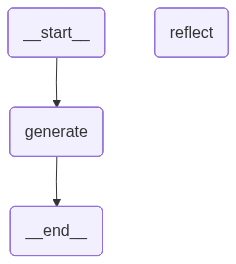

In [15]:
app